In [493]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import warnings
from pandas.plotting import parallel_coordinates
warnings.filterwarnings("ignore")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [494]:
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [495]:
a = pd.read_csv('demo.csv', encoding = 'cp949')
b = pd.read_csv('구매내역정보.csv', encoding = 'cp949')

In [496]:
df = pd.merge(a, b, on = 'ID')

In [497]:
#60대 이상 구매력이 있는 뉴시니어 고객층 선정
df = df[df['연령'] < 70] 

In [498]:
#백화점 영업시간외 에러 데이터 제거
df = df[(df['구매시간']>=10) & (df['구매시간']<=20)]

In [499]:
df

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
6468,55844757,2,69,서울 서대문구,식품,농산물,서울 중구,20140705,12,2,3000,0
6469,55844757,2,69,서울 서대문구,식품,수산물,서울 중구,20140705,12,2,18000,0
6470,55844757,2,69,서울 서대문구,레포츠,골프용품/의류,서울 동대문구,20140917,13,1,70000,0
6471,55844757,2,69,서울 서대문구,식품,수산물,서울 중구,20140705,16,-2,-18000,1
6472,55844757,2,69,서울 서대문구,식품,수산물,서울 중구,20140705,16,4,36000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101687,955481370,2,58,경기 의왕시,의류잡화,남성용의류-정장류,경기 안양시,20141225,19,1,60000,0
101688,955481370,2,58,경기 의왕시,의류잡화,패션잡화,경기 안양시,20141225,19,3,93000,0
101689,955481370,2,58,경기 의왕시,가전제품,생활가전,경기 안양시,20141212,20,1,1057000,0
101690,821581510,2,64,경기 안양시,식품,가공식품,경기 광명시,20141221,12,1,5000,0


In [500]:
df['성별'] = df['성별'].map({1: '남', 2: '여'})

In [501]:
df['월']=df['구매일자'].astype(str).str[4:6]

In [502]:
df['요일'] = pd.to_datetime(df.구매일자.astype(str)).dt.day_name().str[:3]

In [503]:
df['연령대'] = pd.cut(df['연령'], bins=[0,60,70], 
                              right=False, 
                              labels=['50대','60대'])

In [504]:
#유의미한 결과가 없어서 취소여부 삭제
df = df[df['취소여부'] != 1] 

In [505]:
#구매금액이 0인 에러데이터 삭제
df = df[df['구매금액'] != 0]

In [506]:
df = df.reset_index().iloc[:,1:]

In [507]:
df

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,월,요일,연령대
0,55844757,여,69,서울 서대문구,식품,농산물,서울 중구,20140705,12,2,3000,0,07,Sat,60대
1,55844757,여,69,서울 서대문구,식품,수산물,서울 중구,20140705,12,2,18000,0,07,Sat,60대
2,55844757,여,69,서울 서대문구,레포츠,골프용품/의류,서울 동대문구,20140917,13,1,70000,0,09,Wed,60대
3,55844757,여,69,서울 서대문구,식품,수산물,서울 중구,20140705,16,4,36000,0,07,Sat,60대
4,55844757,여,69,서울 서대문구,식품,축산물,서울 중구,20140705,16,1,11000,0,07,Sat,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84323,955481370,여,58,경기 의왕시,의류잡화,남성용의류-정장류,경기 안양시,20141225,19,1,60000,0,12,Thu,50대
84324,955481370,여,58,경기 의왕시,의류잡화,패션잡화,경기 안양시,20141225,19,3,93000,0,12,Thu,50대
84325,955481370,여,58,경기 의왕시,가전제품,생활가전,경기 안양시,20141212,20,1,1057000,0,12,Fri,50대
84326,821581510,여,64,경기 안양시,식품,가공식품,경기 광명시,20141221,12,1,5000,0,12,Sun,60대


In [508]:
df.상품대분류명.unique()

array(['식품', '레포츠', '가구', '가전제품', '의류잡화', '생활잡화', '명품'], dtype=object)

In [509]:
df.상품중분류명.unique()

array(['농산물', '수산물', '골프용품/의류', '축산물', '가구', 'PC/노트북/프린터/카메라', '컴퓨터주변기기',
       '남성용의류-정장류', '주방가전', '가공식품', '여성용의류-SPA', '스포츠용품/의류', '여성용의류-이너웨어',
       '생활용품', '여성용의류-정장류', '구두', '음료', '아동용의류', '생활가전', '주방용품', '패션잡화',
       '건강식품', '남성용의류-캐주얼', '여성용의류-고급의류', '화장품', '명품', 'TV/AV', '휴대폰/태블릿',
       '여성용의류-캐주얼', '침구류', '주얼리'], dtype=object)

In [513]:
sns.set_palette('Accent')

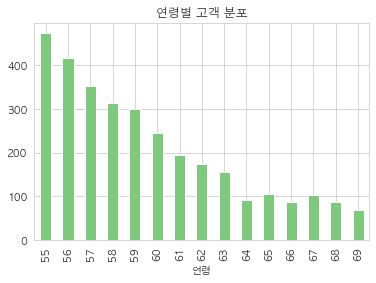

In [514]:
df.groupby('연령')['ID'].nunique().plot.bar()
plt.title('연령별 고객 분포')
plt.show()

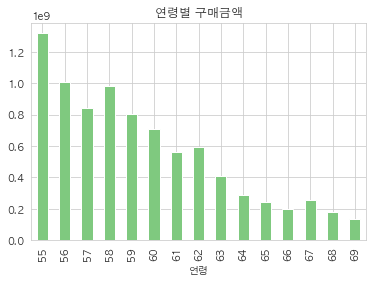

In [515]:
df.groupby('연령')['구매금액'].sum().plot.bar()
plt.title('연령별 구매금액')
plt.show()

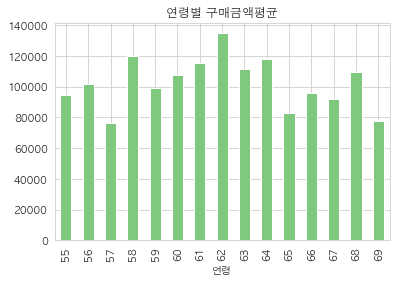

In [516]:
# 별 의미없음
df.groupby('연령')['구매금액'].mean().plot.bar()
plt.title('연령별 구매금액평균')
plt.show()

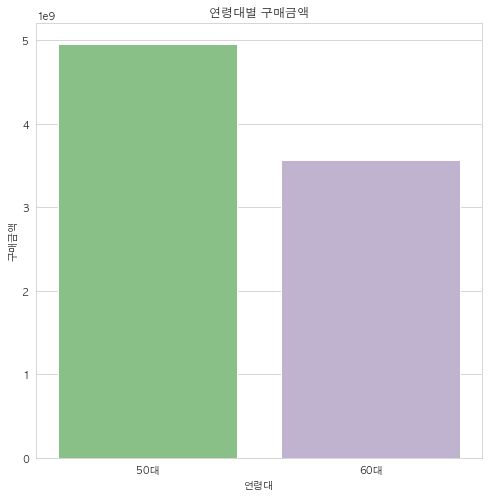

In [519]:
# 연령대별 구매금액
plt.figure(figsize=(8,8))
sns.barplot(x="연령대", y="구매금액", data=df,estimator=sum, ci=False)
plt.xlabel('연령대')
plt.ylabel('구매금액')
plt.title('연령대별 구매금액')
plt.show()

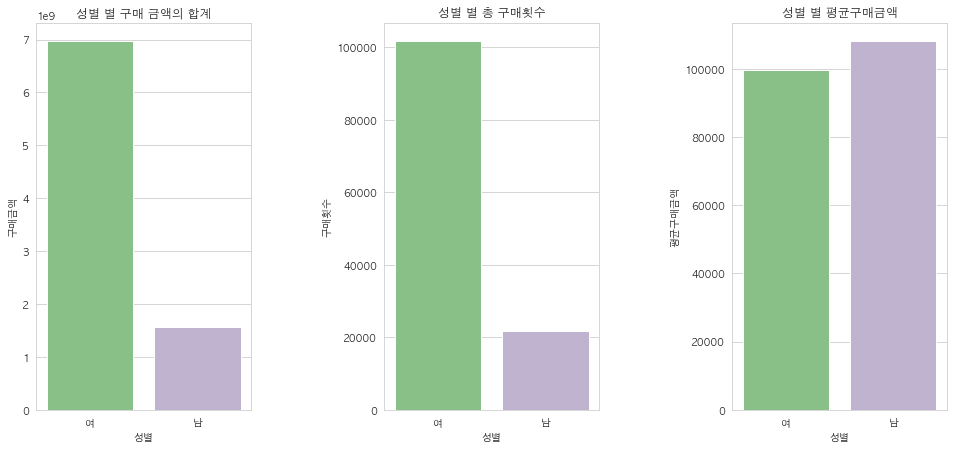

In [520]:
fig, axes = plt.subplots(1, 3, figsize=(15,8))
sns.barplot(x="성별", y="구매금액", data=df, estimator=sum, ax=axes[0], ci=False)
axes[0].set_ylabel('구매금액')
axes[0].set_title('성별 별 구매 금액의 합계')

sns.barplot(x="성별", y="구매수량", data=df, estimator=sum, ax=axes[1], ci=False)
axes[1].set_ylabel('구매횟수')
axes[1].set_title('성별 별 총 구매횟수')

sns.barplot(x="성별", y="구매금액", data=df, ax= axes[2], ci=False)
axes[2].set_ylabel('평균구매금액')
axes[2].set_title('성별 별 평균구매금액')
plt.tight_layout(7)
plt.show()

In [521]:
df['월'] = df['월'].astype('int')

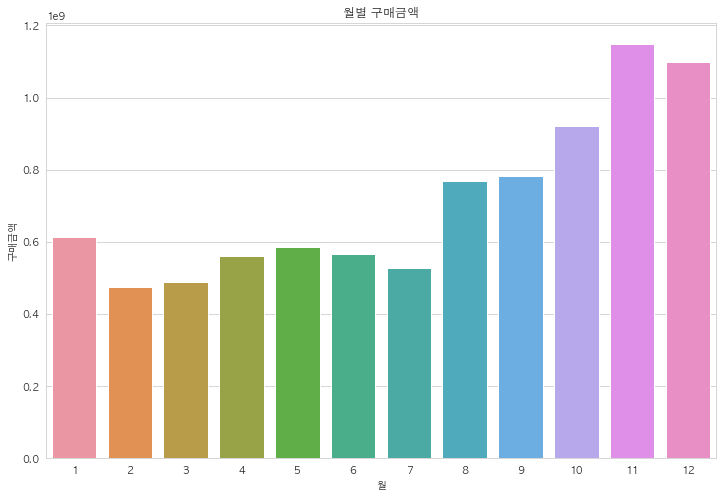

In [522]:
# 월별 구매금액
# 연초 소비심리 위축 // 연말 소비증가
# 이유는 각종 보너스, 연말 정산등 한 해를 마무리하며 소비를 하는 이유인 것으로 예상
plt.figure(figsize=(12,8))
sns.barplot(x="월", y="구매금액", data=df, estimator=sum, ci=False)
plt.xlabel('월')
plt.ylabel('구매금액')
plt.title('월별 구매금액')
plt.show()

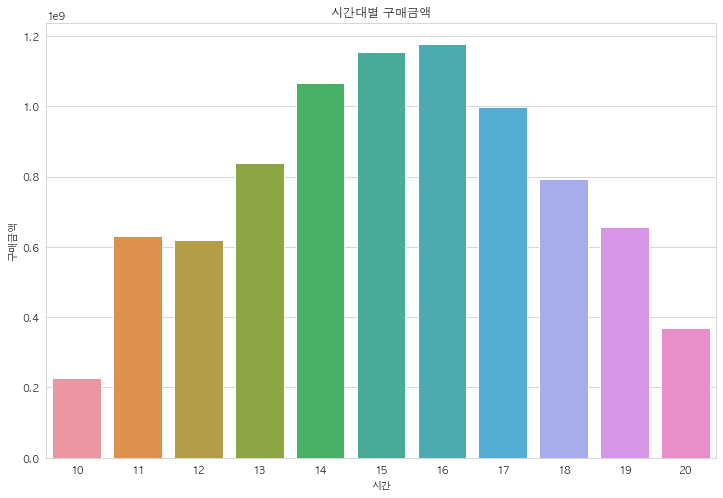

In [523]:
# 퇴근후가 가장 많을 것으로 예상했으나 예상과는 다르게 2~4시쯤 구매금액이 높음
# 연령대가 높다보니 직장인들보다는 은퇴 후 가정주부가 많은 것으로 예상
# 저녁식사를 위한 장보기 및 쇼핑이 다수
plt.figure(figsize=(12,8))
sns.barplot(x="구매시간", y="구매금액", data=df, estimator=sum, ci=False)
plt.xlabel('시간')
plt.ylabel('구매금액')
plt.title('시간대별 구매금액')
plt.show()

In [524]:
weekday = df.groupby(['요일'], as_index = False)['구매금액'].sum().sort_values(by = '구매금액', ascending = False)

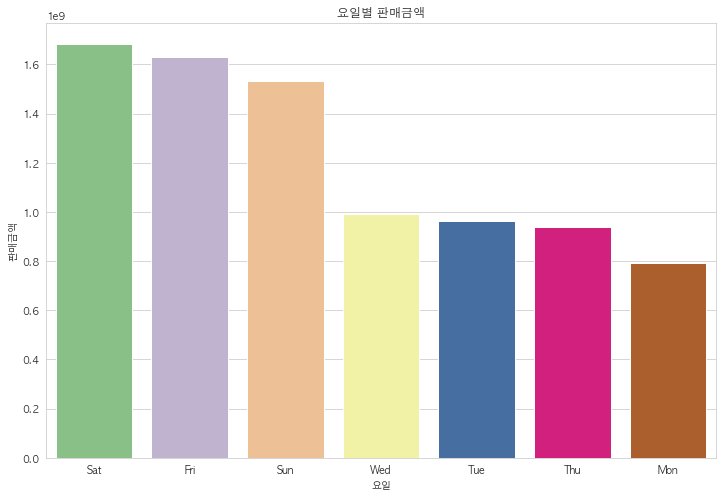

In [525]:
plt.figure(figsize=(12,8))
sns.barplot(x="요일", y="구매금액", data= weekday)
plt.xlabel('요일')
plt.ylabel('판매금액')
plt.title('요일별 판매금액')
plt.show()

In [526]:
catagory_1 = df.groupby(['상품중분류명'], as_index = False)['구매금액'].sum().sort_values(by = '구매금액', ascending = False)

In [527]:
catagory_2 = df.groupby(['상품중분류명'], as_index = False)['구매수량'].count().sort_values(by = '구매수량', ascending = False)

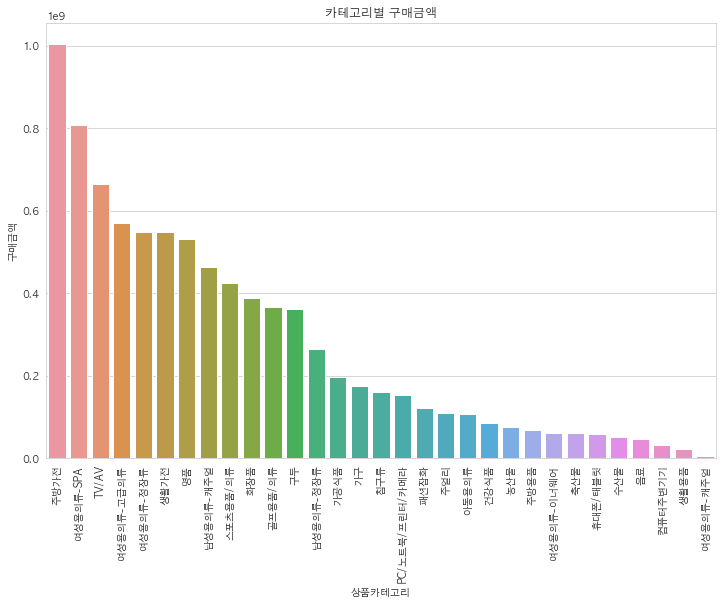

In [528]:
plt.figure(figsize=(12,8))
sns.barplot(x="상품중분류명", y="구매금액", data=catagory_1, estimator=sum, ci=False)
plt.xticks(rotation=90)
plt.xlabel('상품카테고리')
plt.ylabel('구매금액')
plt.title('카테고리별 구매금액')
plt.show()

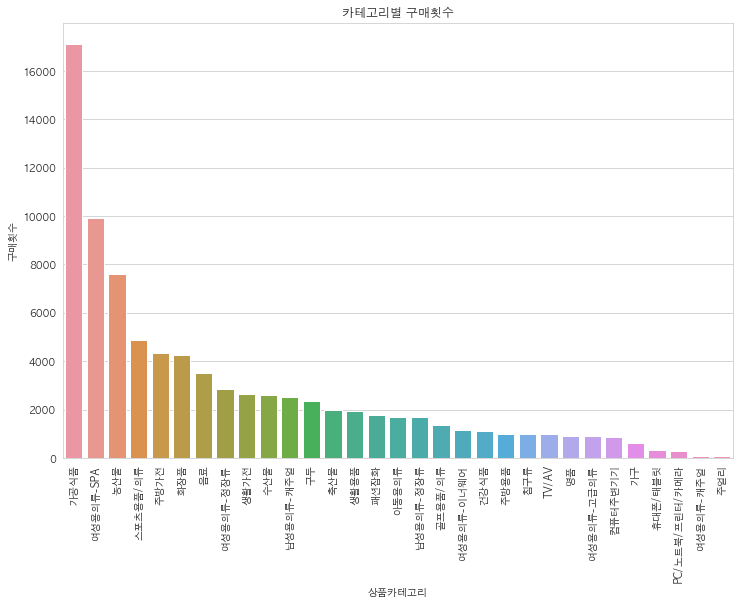

In [529]:
#가공식품, 농산물 등 가격대가 낮아 구매 금액은 저조하지만 저녁장을 보며 구매가 많이 이루어지는 것을 알 수 있음
plt.figure(figsize=(12,8))
sns.barplot(x="상품중분류명", y="구매수량", data=catagory_2)
plt.xticks(rotation=90)
plt.xlabel('상품카테고리')
plt.ylabel('구매횟수')
plt.title('카테고리별 구매횟수')
plt.show()

In [530]:
catagory_3 = df.groupby(['상품대분류명'], as_index = False)['구매금액'].sum().sort_values(by = '구매금액', ascending = False)

In [531]:
catagory_4 = df.groupby(['상품대분류명'], as_index = False)['구매수량'].sum().sort_values(by = '구매수량', ascending = False)

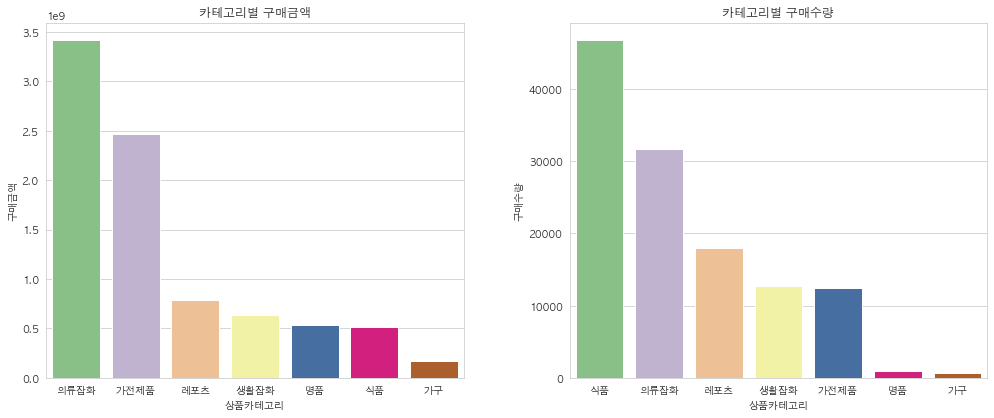

In [532]:
# 마찬가지로 식품이 구매수량은 압도적
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.barplot(x="상품대분류명", y="구매금액", data=catagory_3, estimator=sum, ci=False,ax=axes[0])
axes[0].set_xlabel('상품카테고리')
axes[0].set_ylabel('구매금액')
axes[0].set_title('카테고리별 구매금액')

sns.barplot(x="상품대분류명", y="구매수량", data=catagory_4, estimator=sum, ci=False, ax=axes[1])
axes[1].set_xlabel('상품카테고리')
axes[1].set_ylabel('구매수량')
axes[1].set_title('카테고리별 구매수량')

plt.tight_layout(5)
plt.show()

In [549]:
df[df['상품대분류명']=='의류잡화'].groupby('상품중분류명')['구매금액'].sum().sort_values()

상품중분류명
여성용의류-캐주얼       4999000
여성용의류-이너웨어     60950000
아동용의류         106455000
주얼리           109558000
패션잡화          120595000
남성용의류-정장류     264288000
구두            362376000
남성용의류-캐주얼     464335000
여성용의류-정장류     549416000
여성용의류-고급의류    570269000
여성용의류-SPA     807189000
Name: 구매금액, dtype: int64

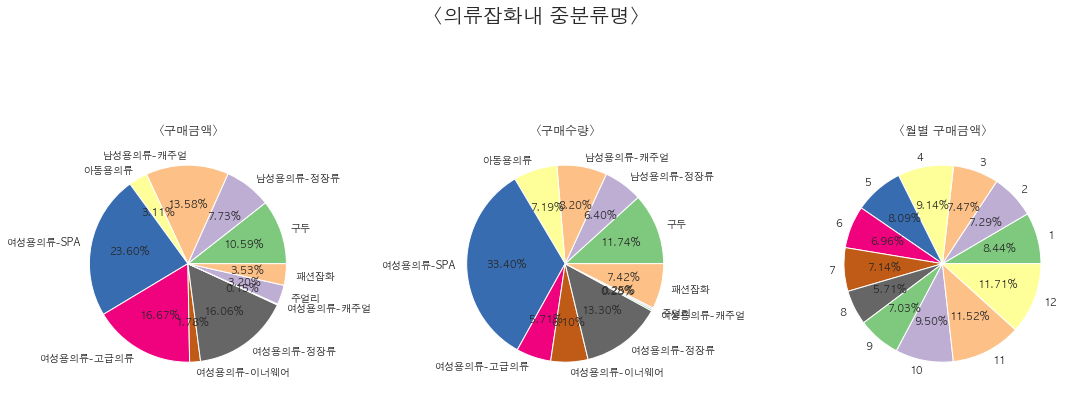

In [578]:
# 여성용SPA의류가 가장 잘팔림
# 의류잡화에서는 거의 비슷하지만 여성용의류-고급의류의 경우 구매금액에서 차이를 보임 (고가제품)
# 월별도 비슷
fig, axes = plt.subplots(1, 3, figsize=(15,7))
plt.suptitle('<의류잡화내 중분류명>',fontsize=20)


df[df['상품대분류명']=='의류잡화'].groupby('상품중분류명')['구매금액'].sum().plot.pie(ax=axes[0],autopct='%.2f%%')
axes[0].set_ylabel('')
axes[0].set_title('<구매금액>')

df[df['상품대분류명']=='의류잡화'].groupby('상품중분류명')['구매수량'].sum().plot.pie(ax=axes[1],autopct='%.2f%%')
axes[1].set_ylabel('')
axes[1].set_title('<구매수량>')

df[df['상품대분류명']=='의류잡화'].groupby('월')['구매금액'].sum().plot.pie(ax=axes[2],autopct='%.2f%%')
axes[2].set_ylabel('')
axes[2].set_title('<월별 구매금액>')

plt.tight_layout()
plt.show()

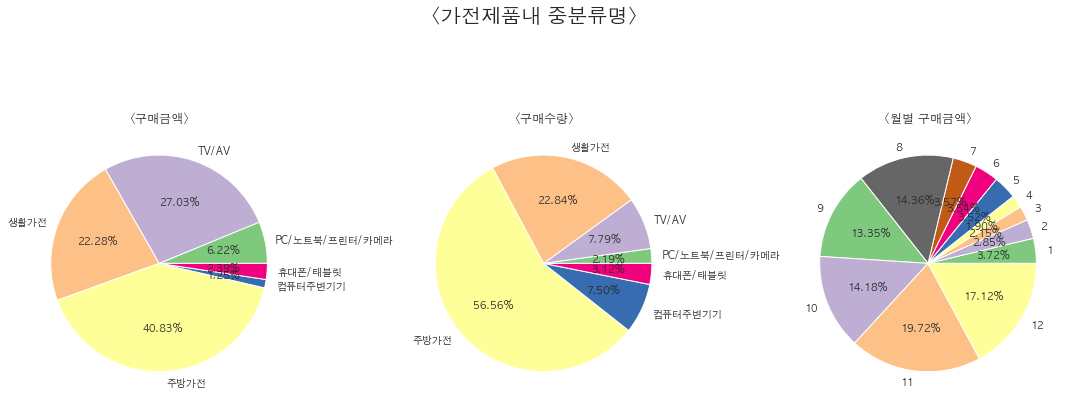

In [580]:
#### 마케팅 포인트1 ####
# 가전제품내에서는 주방가전이 가장 높고 생활가전이나 tv가 그다음으로 높음
# 가격대가 있는 만큼 연초에는 소비 down 연말에 소비 up

fig, axes = plt.subplots(1, 3, figsize=(15,7))
plt.suptitle('<가전제품내 중분류명>',fontsize=20)


df[df['상품대분류명']=='가전제품'].groupby('상품중분류명')['구매금액'].sum().plot.pie(ax=axes[0],autopct='%.2f%%')
axes[0].set_ylabel('')
axes[0].set_title('<구매금액>')

df[df['상품대분류명']=='가전제품'].groupby('상품중분류명')['구매수량'].sum().plot.pie(ax=axes[1],autopct='%.2f%%')
axes[1].set_ylabel('')
axes[1].set_title('<구매수량>')

df[df['상품대분류명']=='가전제품'].groupby('월')['구매금액'].sum().plot.pie(ax=axes[2],autopct='%.2f%%')
axes[2].set_ylabel('')
axes[2].set_title('<월별 구매금액>')

plt.tight_layout()
plt.show()

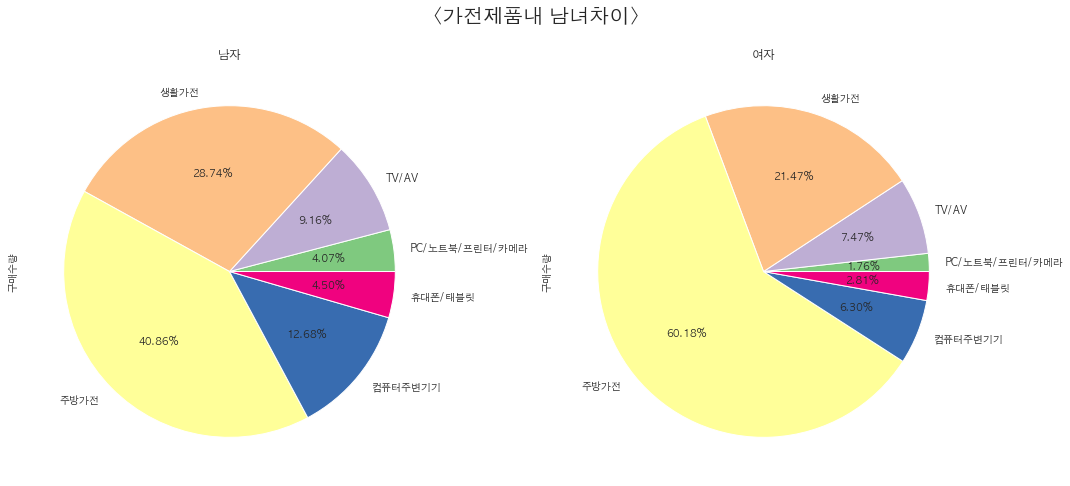

In [597]:
####마케팅 포인트 2####
#남자가 여자에 비해 확실히 주방 가전보다는 태블릿, pc, 컴퓨터 등 전자기기에 관심을 많이 가짐

fig, axes = plt.subplots(1, 2, figsize=(15,7))
plt.suptitle('<가전제품내 남녀차이>',fontsize=20)

df[(df['상품대분류명']=='가전제품')& (df['성별']=='남')].groupby('상품중분류명')['구매수량'].sum().plot.pie(ax=axes[0],autopct='%.2f%%')
axes[0].set_title('남자')

df[(df['상품대분류명']=='가전제품')& (df['성별']=='여')].groupby('상품중분류명')['구매수량'].sum().plot.pie(ax=axes[1],autopct='%.2f%%')
axes[1].set_title('여자')
plt.tight_layout()
plt.show()

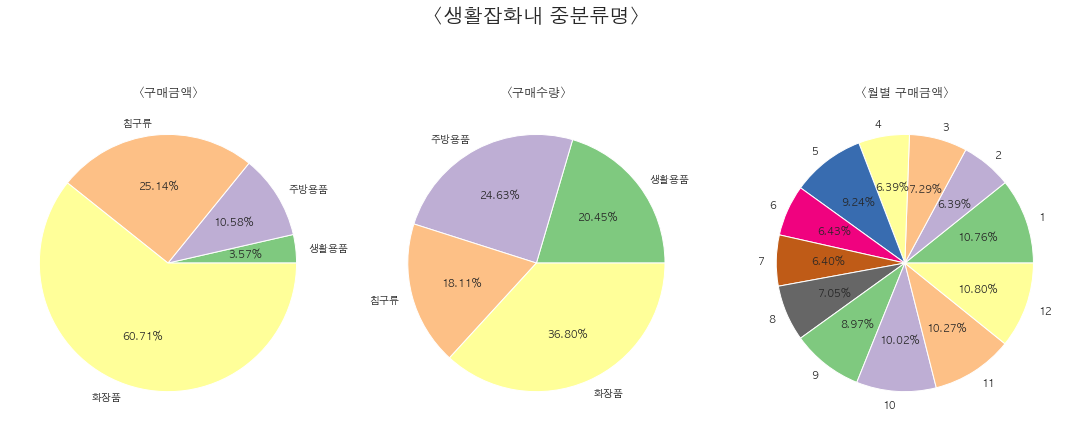

In [600]:
#### 마케팅 포인트 3 ####
# 생활잡화 내에서는 화장품이 구매금액의 60%를 차지함
# 50,60대이다 보니 주방용품,생활용품등의 필수재나 이미 갖추어져 있는 것 보다는 관리에 필요한 화장품에 관심이 높음
# 월별판매량은 비슷함


fig, axes = plt.subplots(1, 3, figsize=(15,7))
plt.suptitle('<생활잡화내 중분류명>',fontsize=20)

df[df['상품대분류명']=='생활잡화'].groupby('상품중분류명')['구매금액'].sum().plot.pie(ax=axes[0],autopct='%.2f%%')
axes[0].set_ylabel('')
axes[0].set_title('<구매금액>')

df[df['상품대분류명']=='생활잡화'].groupby('상품중분류명')['구매수량'].sum().plot.pie(ax=axes[1],autopct='%.2f%%')
axes[1].set_ylabel('')
axes[1].set_title('<구매수량>')

df[df['상품대분류명']=='생활잡화'].groupby('월')['구매금액'].sum().plot.pie(ax=axes[2],autopct='%.2f%%')
axes[2].set_ylabel('')
axes[2].set_title('<월별 구매금액>')

plt.tight_layout()
plt.show()

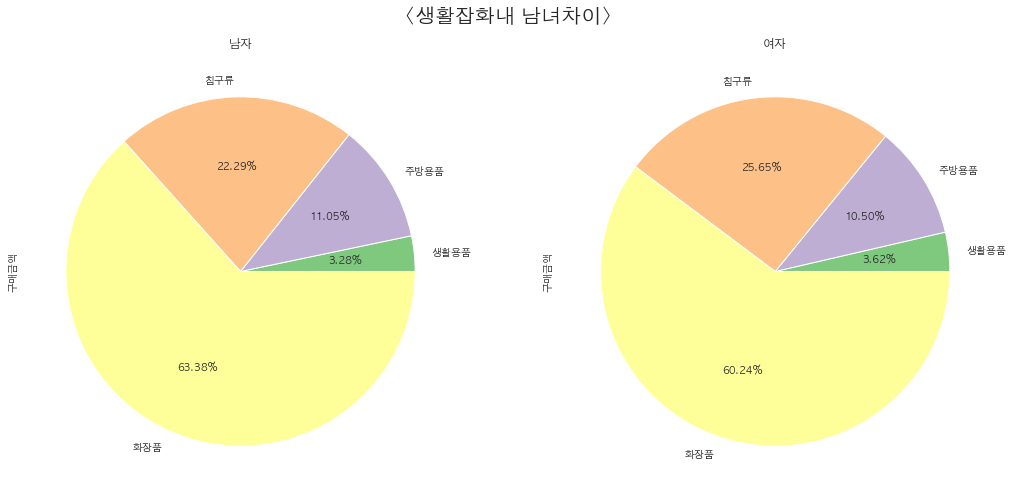

In [603]:
# 남자, 여자 모두 자기관리(화장품)에 관심이 있음
# 오히려 남자가 더 많이 구매 (사실 부부가 카드를 공유하는 경우가 많아 큰 의미는 없음)
####마케팅 포인트 3 포함####

fig, axes = plt.subplots(1, 2, figsize=(15,7))
plt.suptitle('<생활잡화내 남녀차이>',fontsize=20)

df[(df['상품대분류명']=='생활잡화')& (df['성별']=='남')].groupby('상품중분류명')['구매금액'].sum().plot.pie(ax=axes[0],autopct='%.2f%%')
axes[0].set_title('남자')

df[(df['상품대분류명']=='생활잡화')& (df['성별']=='여')].groupby('상품중분류명')['구매금액'].sum().plot.pie(ax=axes[1],autopct='%.2f%%')
axes[1].set_title('여자')
plt.tight_layout()
plt.show()

## feature 및 RFM모형 만들기

In [604]:
df2 = pd.DataFrame({'ID': df.ID.unique()})

In [605]:
f = df.groupby('ID')['구매금액'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()
df2 = df2.merge(f, how='left') 
df2

,ID,총구매액,구매건수,평균구매액,최대구매액
0,55844757,138000,5,27600,70000
1,165639634,5308000,5,1061600,3978000
2,868529581,1007000,16,62938,711000
3,969901888,1413000,51,27706,417000
4,779190802,1721000,121,14223,337000
...,...,...,...,...,...
3155,154314532,846000,3,282000,684000
3156,416998709,41000,3,13667,21000
3157,168692065,10000,2,5000,9000
3158,955481370,1219000,4,304750,1057000


In [606]:
f =df.groupby('ID')['구매일자'].nunique().reset_index().rename(columns={'구매일자':'총방문횟수'})
df2 = df2.merge(f, how='left')
df2

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수
0,55844757,138000,5,27600,70000,2
1,165639634,5308000,5,1061600,3978000,3
2,868529581,1007000,16,62938,711000,14
3,969901888,1413000,51,27706,417000,30
4,779190802,1721000,121,14223,337000,20
...,...,...,...,...,...,...
3155,154314532,846000,3,282000,684000,2
3156,416998709,41000,3,13667,21000,1
3157,168692065,10000,2,5000,9000,1
3158,955481370,1219000,4,304750,1057000,2


In [607]:
visit_cnt = df.groupby('ID')['구매일자'].nunique()
per_amount = (df.groupby('ID')['구매금액'].sum() / visit_cnt).astype('int').reset_index().rename(columns={0:'방문당평균구매액'})
per_count = (df.groupby('ID')['구매금액'].count() / visit_cnt).round(1).reset_index().rename(columns={0:'방문당구매건수'})
f = pd.merge(per_amount, per_count, on='ID')
df2 = df2.merge(f, how='left') 
df2

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수
0,55844757,138000,5,27600,70000,2,69000,2.5
1,165639634,5308000,5,1061600,3978000,3,1769333,1.7
2,868529581,1007000,16,62938,711000,14,71928,1.1
3,969901888,1413000,51,27706,417000,30,47100,1.7
4,779190802,1721000,121,14223,337000,20,86050,6.0
...,...,...,...,...,...,...,...,...
3155,154314532,846000,3,282000,684000,2,423000,1.5
3156,416998709,41000,3,13667,21000,1,41000,3.0
3157,168692065,10000,2,5000,9000,1,10000,2.0
3158,955481370,1219000,4,304750,1057000,2,609500,2.0


#### RFM모형
- r: 가장 최근에 방문?
- f: 얼마나 자주?
- m: 얼마나 많이?

In [608]:
df.구매일자 = df.구매일자.astype(str).astype('datetime64')
# 최종 구매일 다음날을 기준으로 계산 
now = df.구매일자.max()+pd.DateOffset(days=1)
# method chaining (multi-line)
recency = (df.groupby('ID')['구매일자']
           .agg(lambda x,y: (y - x).min().days, now).reset_index()
           .rename(columns={'구매일자':'recency'})
          )
df2 = pd.merge(df2, recency, on = "ID")

In [609]:
frequency =  df.groupby('ID')['구매일자'].agg([('frequency', pd.Series.nunique)]).reset_index()
df2 = pd.merge(df2, frequency, on = "ID")

In [610]:
monetary = df.groupby('ID')['구매금액'].agg([('monetary', np.sum)]).reset_index()
df2 = pd.merge(df2, monetary, on = "ID")

In [612]:
df2

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수,recency,frequency,monetary
0,55844757,138000,5,27600,70000,2,69000,2.5,106,2,138000
1,165639634,5308000,5,1061600,3978000,3,1769333,1.7,46,3,5308000
2,868529581,1007000,16,62938,711000,14,71928,1.1,17,14,1007000
3,969901888,1413000,51,27706,417000,30,47100,1.7,7,30,1413000
4,779190802,1721000,121,14223,337000,20,86050,6.0,23,20,1721000
...,...,...,...,...,...,...,...,...,...,...,...
3155,154314532,846000,3,282000,684000,2,423000,1.5,6,2,846000
3156,416998709,41000,3,13667,21000,1,41000,3.0,11,1,41000
3157,168692065,10000,2,5000,9000,1,10000,2.0,3,1,10000
3158,955481370,1219000,4,304750,1057000,2,609500,2.0,7,2,1219000


In [613]:
df2['r'] = pd.qcut(df2['recency'].rank(method='first'), q=10, labels=range(10,0,-1)).astype(int)
df2['f'] = pd.qcut(df2['frequency'].rank(method='first'), q=10, labels=range(1,11)).astype(int)
df2['m'] = pd.qcut(df2['monetary'], q=10, labels=range(1,11)).astype(int)
df2['RFMgroup'] = df2['r'].map(str) + df2['f'].map(str) + df2['m'].map(str)
df2

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수,recency,frequency,monetary,r,f,m,RFMgroup
0,55844757,138000,5,27600,70000,2,69000,2.5,106,2,138000,2,1,1,211
1,165639634,5308000,5,1061600,3978000,3,1769333,1.7,46,3,5308000,4,2,9,429
2,868529581,1007000,16,62938,711000,14,71928,1.1,17,14,1007000,7,8,5,785
3,969901888,1413000,51,27706,417000,30,47100,1.7,7,30,1413000,9,10,6,9106
4,779190802,1721000,121,14223,337000,20,86050,6.0,23,20,1721000,6,9,6,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,154314532,846000,3,282000,684000,2,423000,1.5,6,2,846000,9,2,5,925
3156,416998709,41000,3,13667,21000,1,41000,3.0,11,1,41000,8,1,1,811
3157,168692065,10000,2,5000,9000,1,10000,2.0,3,1,10000,10,1,1,1011
3158,955481370,1219000,4,304750,1057000,2,609500,2.0,7,2,1219000,8,2,6,826


In [632]:
## 구매력이 가장 중요하다고 판단 m을 5로 놓고 2,3,5 가중치 부여
weights = [2, 3, 5]
df2['RFMscore']=weights[0]*df2['r']+weights[1]*df2['f']+weights[2]*df2['m']
df2

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수,recency,frequency,monetary,r,f,m,RFMgroup,RFMscore,등급
0,55844757,138000,5,27600,70000,2,69000,2.5,106,2,138000,2,1,1,211,12,브론즈
1,165639634,5308000,5,1061600,3978000,3,1769333,1.7,46,3,5308000,4,2,9,429,59,실버
2,868529581,1007000,16,62938,711000,14,71928,1.1,17,14,1007000,7,8,5,785,63,골드
3,969901888,1413000,51,27706,417000,30,47100,1.7,7,30,1413000,9,10,6,9106,78,플레티넘
4,779190802,1721000,121,14223,337000,20,86050,6.0,23,20,1721000,6,9,6,696,69,골드
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,154314532,846000,3,282000,684000,2,423000,1.5,6,2,846000,9,2,5,925,49,실버
3156,416998709,41000,3,13667,21000,1,41000,3.0,11,1,41000,8,1,1,811,24,브론즈
3157,168692065,10000,2,5000,9000,1,10000,2.0,3,1,10000,10,1,1,1011,28,브론즈
3158,955481370,1219000,4,304750,1057000,2,609500,2.0,7,2,1219000,8,2,6,826,52,실버


In [633]:
# RFMscore를 기준으로 등급 부여
df2['등급'] = pd.cut(df2['RFMscore'], bins=[0,40,60,75,90,101], 
                              right=False, 
                              labels=['브론즈','실버','골드','플레티넘','다이아'])

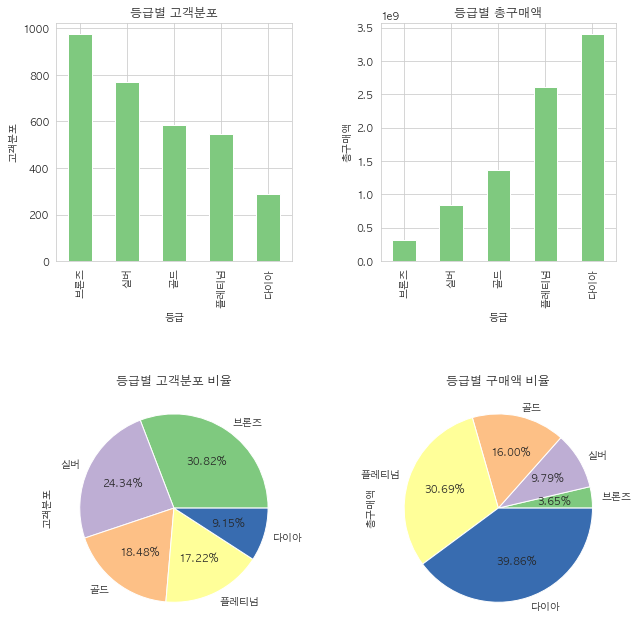

In [651]:
# 등급별 분포 확인
# 브론즈 -> 다이아로 갈수록 고객수는 작아지지만 총구매액은 높아짐 (파레토 법칙)
fig, axes = plt.subplots(2, 2, figsize=(10,10))
df2.groupby('등급')['ID'].count().plot.bar(ax=axes[0,0])
axes[0,0].set_ylabel('고객분포')
axes[0,0].set_title('등급별 고객분포')

df2.groupby('등급')['총구매액'].sum().plot.bar(ax=axes[0,1])
axes[0,1].set_ylabel('총구매액')  
axes[0,1].set_title('등급별 총구매액')

df2.groupby('등급')['ID'].count().plot.pie(ax=axes[1,0],autopct='%.2f%%')
axes[1,0].set_ylabel('고객분포')
axes[1,0].set_title('등급별 고객분포 비율')

df2.groupby('등급')['총구매액'].sum().plot.pie(ax=axes[1,1],autopct='%.2f%%')
axes[1,1].set_ylabel('총구매액')  
axes[1,1].set_title('등급별 구매액 비율')

plt.tight_layout(5)
plt.show()

## vip와 일반고객 분류 및 비교

In [652]:
df3 = pd.merge(df, df2, on = 'ID')
df3.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,...,방문당구매건수,recency,frequency,monetary,r,f,m,RFMgroup,RFMscore,등급
0,55844757,여,69,서울 서대문구,식품,농산물,서울 중구,2014-07-05,12,2,...,2.5,106,2,138000,2,1,1,211,12,브론즈
1,55844757,여,69,서울 서대문구,식품,수산물,서울 중구,2014-07-05,12,2,...,2.5,106,2,138000,2,1,1,211,12,브론즈
2,55844757,여,69,서울 서대문구,레포츠,골프용품/의류,서울 동대문구,2014-09-17,13,1,...,2.5,106,2,138000,2,1,1,211,12,브론즈
3,55844757,여,69,서울 서대문구,식품,수산물,서울 중구,2014-07-05,16,4,...,2.5,106,2,138000,2,1,1,211,12,브론즈
4,55844757,여,69,서울 서대문구,식품,축산물,서울 중구,2014-07-05,16,1,...,2.5,106,2,138000,2,1,1,211,12,브론즈


In [655]:
# 등급을 기준으로 vip와 standard를 나눔

vip = df3.query('등급=="플레티넘" or 등급=="다이아"')

In [656]:
standard = df3.query('등급=="브론즈" or 등급=="실버"')

In [673]:
vip_best = vip.groupby('상품중분류명')['구매금액'].sum().sort_values(ascending=False)

In [674]:
standard_best = standard.groupby('상품중분류명')['구매금액'].sum().sort_values(ascending=False)

In [700]:
#### 마케팅 포인트 4 ####
# 위의 두 세그먼트 비교분석
#구매금액 best
# standard는 주방가전, 생활가전 등 필수재에 대부분 소비를 하는 반면, vip는 여성용의류-SPA, 여성용의류-고급의류 등 사치재에 소비를 많이함
#### 타켓마케팅 ####
pd.DataFrame({"vip": vip_best.index, "standard": standard_best.index}).head(10)

,vip,standard
0,여성용의류-SPA,주방가전
1,여성용의류-고급의류,생활가전
2,주방가전,TV/AV
3,명품,여성용의류-SPA
4,TV/AV,스포츠용품/의류
5,여성용의류-정장류,구두
6,남성용의류-캐주얼,여성용의류-정장류
7,골프용품/의류,남성용의류-캐주얼
8,생활가전,화장품
9,화장품,PC/노트북/프린터/카메라


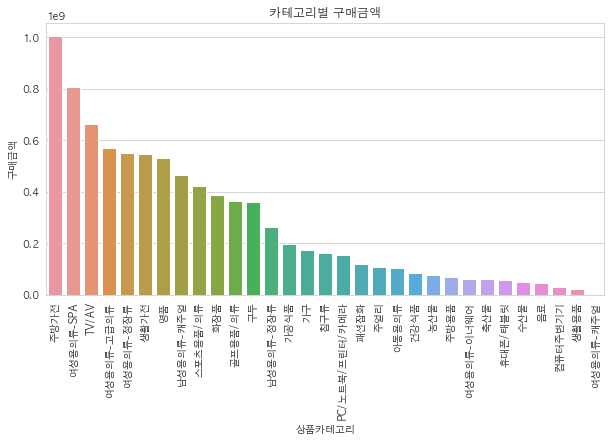

In [668]:
# 위 그래프와 같은것! 참고용 
# vip와 standard가 합쳐져 이런 결과가 나온것 

plt.figure(figsize=(10,5))
sns.barplot(x="상품중분류명", y="구매금액", data=catagory_1, estimator=sum, ci=False)
plt.xticks(rotation=90)
plt.xlabel('상품카테고리')
plt.ylabel('구매금액')
plt.title('카테고리별 구매금액')
plt.show()

In [676]:
vip_best2 = vip.groupby('상품중분류명')['구매수량'].count().sort_values(ascending=False)

In [677]:
standard_best2 = standard.groupby('상품중분류명')['구매수량'].count().sort_values(ascending=False)

In [678]:
# 위의 두 세그먼트 비교분석
# 구매수량best
# 구매수량에서는 별차이없음
# vip도 가공식품, 농산물등 마트쇼핑은 자주 함.
pd.DataFrame({"vip": vip_best2.index, "standard": standard_best2.index}).head()

,vip,standard
0,가공식품,가공식품
1,여성용의류-SPA,여성용의류-SPA
2,농산물,주방가전
3,스포츠용품/의류,스포츠용품/의류
4,화장품,생활가전


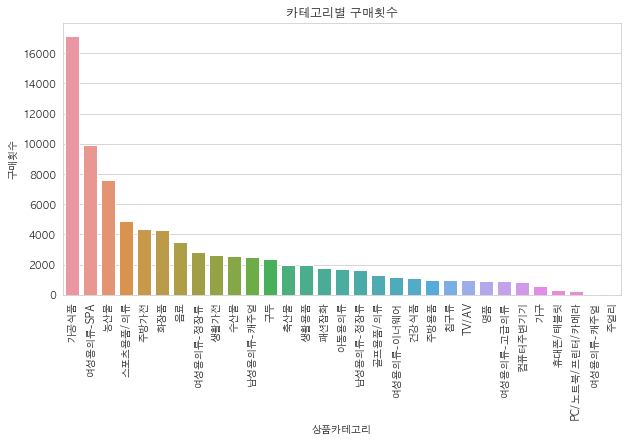

In [683]:
# 위 그래프와 같은것! 참고용 
# vip와 standard가 합쳐져 이런 결과가 나온것 

plt.figure(figsize=(10,5))
sns.barplot(x="상품중분류명", y="구매수량", data=catagory_2)
plt.xticks(rotation=90)
plt.xlabel('상품카테고리')
plt.ylabel('구매횟수')
plt.title('카테고리별 구매횟수')
plt.show()

#### vip와 stadard의 방문당 평균구매액

In [695]:
#### 마케팅 포인트5 ####
#평균 구매 금액을 올리자!
int(vip['방문당평균구매액'].mean())

286739

In [696]:
int(standard['방문당평균구매액'].mean())

172408

In [693]:
mart =df3.query('상품중분류명=="가공식품" or 상품중분류명=="음료" or 상품중분류명=="농산물" or 상품중분류명=="축산물" or 상품중분류명=="수산물"')

In [694]:
int(mart.groupby(['ID','구매일자'])['구매금액'].sum().mean())

27945

In [699]:
df2.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수,recency,frequency,monetary,r,f,m,RFMgroup,RFMscore,등급
0,55844757,138000,5,27600,70000,2,69000,2.5,106,2,138000,2,1,1,211,12,브론즈
1,165639634,5308000,5,1061600,3978000,3,1769333,1.7,46,3,5308000,4,2,9,429,59,실버
2,868529581,1007000,16,62938,711000,14,71928,1.1,17,14,1007000,7,8,5,785,63,골드
3,969901888,1413000,51,27706,417000,30,47100,1.7,7,30,1413000,9,10,6,9106,78,플레티넘
4,779190802,1721000,121,14223,337000,20,86050,6.0,23,20,1721000,6,9,6,696,69,골드


In [701]:
#### 마케팅 포인트 6 ####
#### rfm 타켓마케팅
#r과 f가 낮고, m이 높은 경우 -> 구매력이 있지만 자주 오지 않는 휴면고객 (명품입고소식, 할인이벤트 문자)
df2.query('r<=4 & f<=4 & m>=8')

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수,recency,frequency,monetary,r,f,m,RFMgroup,RFMscore,등급
1,165639634,5308000,5,1061600,3978000,3,1769333,1.7,46,3,5308000,4,2,9,429,59,실버
155,804044385,2673000,2,1336500,1883000,2,1336500,1.0,45,2,2673000,4,1,8,418,51,실버
158,327732660,4812000,16,300750,2309000,5,962400,3.2,60,5,4812000,3,4,9,349,63,골드
365,243826995,2778000,8,347250,2442000,5,555600,1.6,39,5,2778000,4,4,8,448,60,골드
585,593471560,3176000,9,352889,1954000,3,1058666,3.0,40,3,3176000,4,3,8,438,57,실버
780,640386717,9210000,6,1535000,4529000,3,3070000,2.0,110,3,9210000,2,3,10,2310,63,골드
839,158679215,3108000,3,1036000,2993000,2,1554000,1.5,126,2,3108000,1,1,8,118,45,실버
886,205594382,2674000,7,382000,2193000,4,668500,1.8,55,4,2674000,3,4,8,348,58,실버
1198,778693467,4492000,5,898400,4431000,4,1123000,1.2,45,4,4492000,4,4,9,449,65,골드
1290,965501961,6173000,11,561182,1066000,3,2057666,3.7,47,3,6173000,4,3,10,4310,67,골드


In [702]:
#r과 f가 높고 m이 낮은 경우 -> 구매력이 크진 않지만 자주 오는 것을 이용 -> 스탬프 이벤트로 지속적인 소비 유도
df2.query('r>=8 & f>=8 & m<=5')

,ID,총구매액,구매건수,평균구매액,최대구매액,총방문횟수,방문당평균구매액,방문당구매건수,recency,frequency,monetary,r,f,m,RFMgroup,RFMscore,등급
20,25134966,1143000,40,28575,185000,19,60157,2.1,4,19,1143000,10,9,5,1095,72,골드
108,736646305,403000,35,11514,70000,19,21210,1.8,8,19,403000,8,9,3,893,58,실버
118,97368650,1197000,32,37406,141000,19,63000,1.7,4,19,1197000,9,9,5,995,70,골드
132,877028523,507000,39,13000,35000,15,33800,2.6,12,15,507000,8,8,3,883,55,실버
260,409603109,1004000,29,34621,212000,17,59058,1.7,8,17,1004000,8,8,5,885,65,골드
292,708391056,825000,24,34375,444000,12,68750,2.0,9,12,825000,8,8,5,885,65,골드
381,705877665,848000,36,23556,235000,19,44631,1.9,9,19,848000,8,9,5,895,68,골드
485,36793416,685000,27,25370,198000,15,45666,1.8,5,15,685000,9,8,4,984,62,골드
524,134025044,621000,22,28227,141000,14,44357,1.6,1,14,621000,10,8,4,1084,64,골드
557,41895986,1136000,28,40571,426000,13,87384,2.2,11,13,1136000,8,8,5,885,65,골드
